# ASHER'S DATA COLLECTION PROJECT 

Howdy y'all! Today we are going to explore some data we queried using SQL. 
#### The plan:
We will explore the 10 most popular neighborhood destinations as well as the 10 most popular cab companies. We will then build super cool graphs for each one of the explored neighborhoods and companies. We will then make a conclusion on the popularity of these neighborhoods and companies and explain WHY?. 

###### Hypothesis testing 

The next deep dive will be into the queried data from the chicago loop area. We will explore if weather has an affect on cab ride duration and if so HOW? 


###### The tools 

We will be using:

- Pandas 
- Numpy 
- Matplot lib
- Seaborn (for pretty graphs)
- scipy (for fun statistics!)

In [67]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
set1 = pd.read_csv('/datasets/project_sql_result_01.csv')
set2 = pd.read_csv('/datasets/project_sql_result_04.csv')

print(set1.head())
print(set2.head())
set1.info()
set2.info()

print(set1.describe())
print(set2.describe())

sns.reset_defaults()
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True
)

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
       t

### DATA EXPLORATION THE JOURNEY 

In this first stage we opned the CSVs and checked out the data. I decided to go overkill by using: the head method: to see the columns and first rows of data, the info() function: to see the data types and what kind of structures we are playing with, the describe() function: to understand the statistics and data (mean median mode std and all that fun stuff). 

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


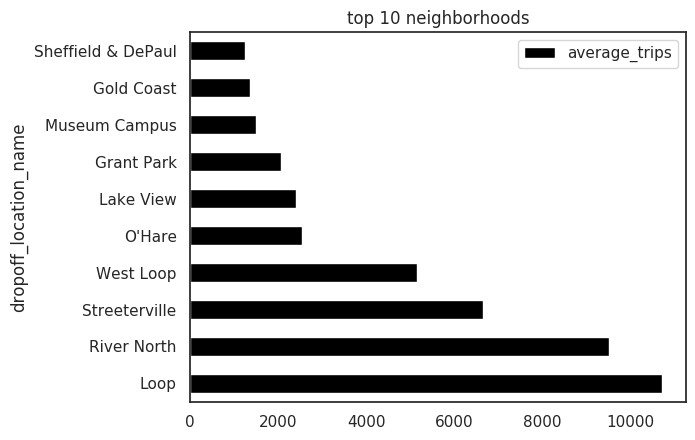

In [68]:
print(set2.sort_values('average_trips', ascending = False))
best2 = set2.query('average_trips > 1247')
print(best2)
best2.plot.barh(x = 'dropoff_location_name', y = 'average_trips', color= 'black')
plt.title('top 10 neighborhoods')
plt.show()


#### The top 10 neighborhoods

Here we took the top ten neighborhoods and graphed them out. It is unsuprising that the loop, Chicago's central business district, has the most trips. Business men got to keep moving. River north is also a business// luxury district. It is safe to say many of the most popular neighborhoods are industrial//business areas. Think urban. 

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


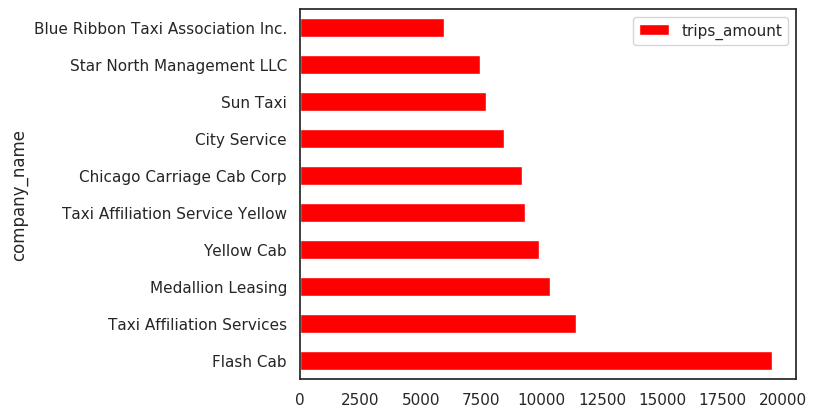

In [69]:
best1 = set1.query('trips_amount > 5952')
print(best1)
best1.plot.barh(x = 'company_name', y = 'trips_amount', color='red')

# Top 10 cab companies 

It looks like flash cab takes the cake. People seem to like them probably because they are fast??. The rest of them have a standard distribution not too many crazy surprises. I noticed that all the top cab services have no numbers or funky parts to their name. It could be that people trust cab services without numbers or symbols in the name. 

In [78]:
set3 = pd.read_csv('/datasets/project_sql_result_07.csv')
set3['start_ts'] = pd.to_datetime(set3['start_ts'])
set3['day'] = pd.DatetimeIndex(set3['start_ts']).dayofweek
print(set3.head())
set3.info()
print(set3.describe())

             start_ts weather_conditions  duration_seconds  day
0 2017-11-25 16:00:00               Good            2410.0    5
1 2017-11-25 14:00:00               Good            1920.0    5
2 2017-11-25 12:00:00               Good            1543.0    5
3 2017-11-04 10:00:00               Good            2512.0    5
4 2017-11-11 07:00:00               Good            1440.0    5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
day                   1068 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 33.5+ KB
       duration_seconds     day
count       1068.000000  1068.0
mean        2071.731273     5.0
std          769.461125     0.0
min            0.000000     5.0
25%         1438.250000     5.0
50%         1980.000000     5.0
75%         2580.000000 

# Data Exploration part 2 Electric Bugaloo 

We explored the second dataset with the same technique as the first. the head method: to see the columns and first rows of data, the info() function: to see the data types and what kind of structures we are playing with, the describe() function: to understand the statistics and data (mean median mode std and all that fun stuff). 

# Hypothesis
We start with the null hypothesis H₀ (from Ancient Greek ὑπόθεσις, meaning “proposal”). For example, “The mean of the population in question equals A,” where A is some number.
The alternative hypothesis, H₁, is based on H₀. For this H₀, H₁ would be, “The mean of the population does not equal A.”

If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. If the p-value is larger than 0.05, we cannot conclude that a significant difference exists.

- Null Hypothesis
"The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays."
To support this why should rainy saturdays change driving?
- Alternative Hypothesis
"The average of duration of rides Loop to O'Hare International Airport does INDEED change on rainy Saturdays."
Rain slows down cars and can cause traffic and or accidents there will probably be a change. 



In [79]:
set4 = set3.query('day == 5')
print(set4)
bad =set4.query('weather_conditions == "Bad"')
print(bad.describe())
good = set4.query('weather_conditions == "Good"')
print(good.describe())

                start_ts weather_conditions  duration_seconds  day
0    2017-11-25 16:00:00               Good            2410.0    5
1    2017-11-25 14:00:00               Good            1920.0    5
2    2017-11-25 12:00:00               Good            1543.0    5
3    2017-11-04 10:00:00               Good            2512.0    5
4    2017-11-11 07:00:00               Good            1440.0    5
...                  ...                ...               ...  ...
1063 2017-11-25 11:00:00               Good               0.0    5
1064 2017-11-11 10:00:00               Good            1318.0    5
1065 2017-11-11 13:00:00               Good            2100.0    5
1066 2017-11-11 08:00:00               Good            1380.0    5
1067 2017-11-04 16:00:00                Bad            2834.0    5

[1068 rows x 4 columns]
       duration_seconds    day
count        180.000000  180.0
mean        2427.205556    5.0
std          721.314138    0.0
min          480.000000    5.0
25%         1962

### Describe breakdown 

Even before we test the hypothesis we can see in the data that there is a difference between the rides where the weather is bad. looks like we are going to reject the null hypothesis. Let's see what happens next!! 

In [80]:
alpha = 0.05

results = st.ttest_ind(bad['duration_seconds'], good['duration_seconds'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


## NULL Hypothisis REJECTED!!!!

As mentioned in describe we see a clear difference in ride duration during bad and good weather! It makes sense, wet roads, wet cars, wet people, everyone rushing around. These factors makes slowdowns much more possible. Bottom line avoid cabs on rainy days going from loop to o'hare. 

# Conclusion 

In the end we are able to glean quite a bit of information from the data we harvested in SQL. We were able to see most popular companies as well as neighborhoods. We were then able to test and reject the null hypothesis that rides take the same time in good weather and bad weather. Very productive day. Now we know don't bother with cabs going from the Loop to O'hare airport on a saturday.